Assignment 4

Determining and removing drawbacks of exponential and running mean. Task 2

Team 20

Ekaterina Orlova, Skoltech, 2020

Pavel Shatalov, Skoltech, 2020

Olesya Kuznecova, Skoltech, 2020

Dmitrii Korzh, Skoltech, 2020

The objective of this laboratory work is to determine conditions for which broadly used
methods of running and exponential mean provide effective solution and conditions under which
they break down. Important outcome of this exercise is getting skill to choose the most effective
method in conditions of uncertainty.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part I. Comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation of 11-year sunspot cycle.

***1. Download monthly mean sunspot number from Canvas***

First of all we need to download monthly mean sunspot number data

In [ ]:
url = "https://raw.githubusercontent.com/pavel1shatalov/lab-1/master/data_group6.txt"
data_group6 = np.array(np.loadtxt(url))

Let's check what we have imported. The format is as follows: year, month, monthly mean sunspot number

In [ ]:
data_group6

array([[1.810e+03, 6.000e+00, 0.000e+00],
       [1.810e+03, 7.000e+00, 0.000e+00],
       [1.810e+03, 8.000e+00, 0.000e+00],
       ...,
       [1.843e+03, 1.100e+01, 3.170e+01],
       [1.843e+03, 1.200e+01, 2.120e+01],
       [1.844e+03, 1.000e+00, 1.570e+01]])

Before we start working it is convenient to extract each of 3 arrays of data

In [ ]:
#year
year=[]
for i in range(len(data_group6)):
    year=np.append(year, data_group6[i,0])
    
#month
month=[]
for i in range(len(data_group6)):
    month=np.append(month, data_group6[i,1])
    
#monthly sunspot number
ssn=[]
for i in range(len(data_group6)):
    ssn=np.append(ssn, data_group6[i,2])

Let's present our data in the DataFrame format


In [ ]:
# this is just to make function pd.to_datetime work properly 
# (it requirs day, month and year minimum)
day = [1 for i in range(len(data_group6))]

In [ ]:
# creating proper data type to work with pandas
pd_sunspots = pd.Series(ssn)
pd_months = pd.Series(month)
pd_years = pd.Series(year)
pd_day = pd.Series(day)

In [ ]:
dataframe = pd.DataFrame({
    'year': pd_years,
    'month': pd_months,
    'sunspots': pd_sunspots,
    'day': pd_day
})

In [ ]:
# combining datetime to make smooth plot
date = pd.to_datetime(dataframe[['year', 'month', 'day']])

***2. Make smoothing of monthly mean data by 13-month running mean.***

Let's make smoothing of monthly mean data by 13-month running mean

In [ ]:
#13-month running mean
ssnRM = []
ssn_mean_first = np.mean(ssn[:6])
ssn_mean_last = np.mean(ssn[-6:])

for i in range(6):
    ssnRM=np.append(ssnRM, ssn_mean_first)

for i in range(6,len(ssn)-6):
    ssnRM=np.append(ssnRM, ssn[i-6]/24 + (ssn[i-5] + ssn[i-4] + ssn[i-3] + ssn[i-2] + ssn[i-1] + ssn[i] + ssn[i+1] + ssn[i+2] + ssn[i+3] + ssn[i+4] + ssn[i+5])/12 + ssn[i+6]/24)

for i in range(6):
    ssnRM=np.append(ssnRM, ssn_mean_last)

In [ ]:
#deviation and variability indicators for 13-month running mean
VIRM=0
DIRM=np.sum((ssn-ssnRM)**2)
for i in range(len(ssn)-2):
    VIRM += (ssnRM[i+2] - 2*ssnRM[i+1] + ssnRM[i])**2
print('Deviation indicator for 13-month running mean is', DIRM)
print('Variation indicator for 13-month running mean is', VIRM)

Deviation indicator for 13-month running mean is 193934.97746527777
Variation indicator for 13-month running mean is 1397.6014930555525


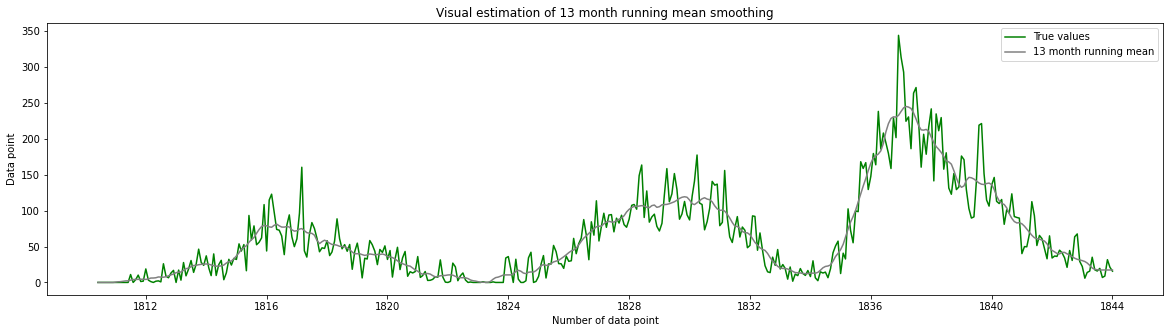

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(date, ssn,'-', color='green', label='True values')
plt.plot(date, ssnRM,'-', color='gray', label='13 month running mean')
plt.title('Visual estimation of 13 month running mean smoothing')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', '13 month running mean'], loc = 'best')

plt.show()

***3. Make forward-backward exponential smoothing of monthly mean sunspot number***.

Let's make smoothing of monthly mean data by forward-backward exponential smoothing for different alphas and plot deviation and variability indicators

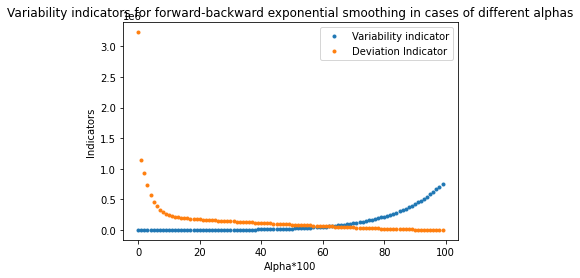

In [ ]:
DIES = np.zeros(100)
VIES = np.zeros(100)
for alpha in range (0,100):
    ssnFES = np.zeros(len(ssn))
    ssnFES[0] = ssn[0]
    for i in range(1,len(ssn)):
        ssnFES[i] = ssnFES[i-1] + (alpha/100)*(ssn[i] - ssnFES[i-1])
    
    ssnBES = np.zeros(len(ssn))
    ssnBES[len(ssn)-1] = ssnFES[len(ssn)-1]
    for i in range(len(ssn)-2, -1, -1):
        ssnBES[i] = ssnBES[i+1] + (alpha/100)*(ssnFES[i] - ssnBES[i+1])                                      
    
    for i in range(len(ssn)):
        DIES[alpha] += (ssn[i] - ssnBES[i])**2
    
    for i in range(len(ssn)-2):
        VIES[alpha] += (ssnBES[i+2] - 2*ssnBES[i+1] + ssnBES[i])**2


plt.plot(VIES, '.')
plt.plot(DIES, '.')
plt.title('Variability indicators for forward-backward exponential smoothing in cases of different alphas')
plt.ylabel('Indicators')
plt.xlabel('Alpha*100')
plt.legend(['Variability indicator','Deviation Indicator'], loc = 'best')
plt.show()

$\alpha \approx 0.6$ seems to be around optimal

In [ ]:
alpha=60
ssnFES = np.zeros(len(ssn))
ssnFES[0] = ssn[0]
DIES1=0
VIES1=0
for i in range(1,len(ssn)):
    ssnFES[i] = ssnFES[i-1] + (alpha/100)*(ssn[i] - ssnFES[i-1])
    
ssnBES = np.zeros(len(ssn))
ssnBES[len(ssn)-1] = ssnFES[len(ssn)-1]
for i in range(len(ssn)-2, 0, -1):
    ssnBES[i] = ssnBES[i+1] + (alpha/100)*(ssnFES[i] - ssnBES[i+1])

for i in range(len(ssn)):
        DIES1 += (ssn[i] - ssnBES[i])**2
    
for i in range(len(ssn)-2):
        VIES1 += (ssnBES[i+2] - 2*ssnBES[i+1] + ssnBES[i])**2

print('Deviation indicator for forward-backward exponential smooth is', DIES1)
print('Variation indicator for forward-backward exponential smooth is', VIES1)

Deviation indicator for forward-backward exponential smooth is 63187.99841746016
Variation indicator for forward-backward exponential smooth is 51177.242269910384


***Is there a smoothing constant 𝛼 that provides better results compared to 13-month running mean according to deviation and variability indicators?***

Thus, we see that with the value $\alpha = 0.6$, the deviation indicator turned out to be significantly smaller than when using the runnning mean method, but the variation indicator is larger.

Let us now plot the data

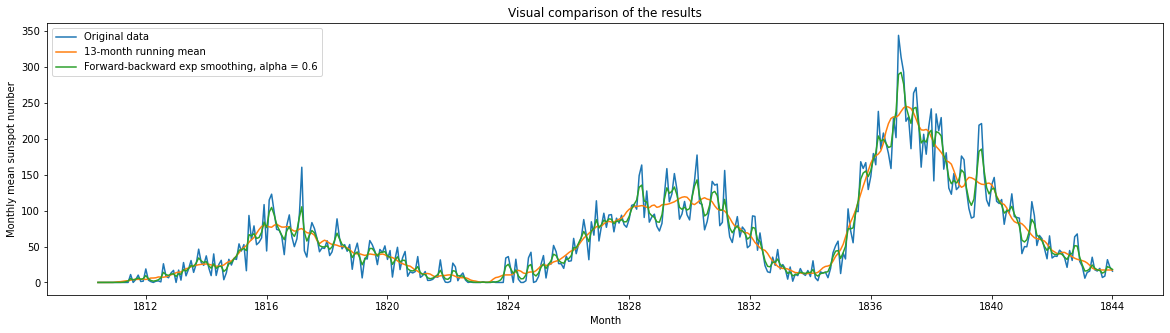

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(date, ssn, label='Original data')
plt.plot(date, ssnRM, label='13-month running mean')
plt.plot(date, ssnBES, label='Forward-backward exp smoothing, alpha=0.6')
plt.title('Visual comparison of the results')
plt.ylabel('Monthly mean sunspot number')
plt.xlabel('Month')
plt.legend(['Original data', '13-month running mean', 'Forward-backward exp smoothing, alpha = 0.6'], loc = 'best')
plt.show()

We can see that 13-month running mean smoothing method provides extremely smooth data, but this method ignores dynamics of the data. By applying forward-backward exponential smoothing we've smoothed the data but also concerved the typical peaks and lows of the curve.

***Part II. 3D surface filtration using forward-backward smoothing***

The goal of this task is to reconstruct the 3D surface on the basis noisy measurements of the surface in conditions of uncertainty.

***1. Download surface data from Canvas***

Let's import surface data, that are matrices presenting the surfaces

In [ ]:
noisy = np.array(np.loadtxt('https://raw.githubusercontent.com/pavel1shatalov/lab-1/master/noisy_surface.txt'))
true = np.array(np.loadtxt('https://raw.githubusercontent.com/pavel1shatalov/lab-1/master/true_surface.txt'))

***2. Plot noisy and true surface for visualization purposes.***

Now we'll plot noisy and true surfaces for visualization purposes, accompanying plots with colorbars.

In [ ]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

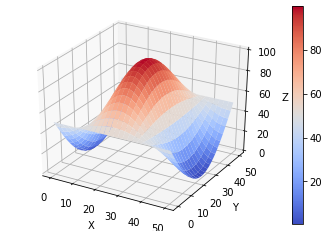

In [ ]:
(fig, ax, surf) = surface_plot(true, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

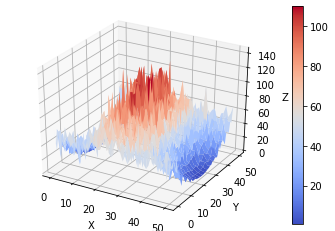

In [ ]:
(fig, ax, surf) = surface_plot(noisy, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

***3. Determine the variance of deviation of noisy surface from the true one.***

In the following cell we'll make a 1D array ($T$ and $N$) from each matrix so it will be easier to compare them

In [ ]:
true_line = np.reshape(true, np.shape(true)[0]**2)
noisy_line = np.reshape(noisy, np.shape(true)[0]**2)

Now we'll determine the variance of deviation $\sigma^2$ of noisy surface from the true one
$$
\sigma^2 = \cfrac{1}{N-1}\sum_{i=1}^N (T[i] - N[i])^2
$$

In [ ]:
Var=0
for i in range(np.shape(true)[0]**2):
    Var+=(1/(np.shape(true)[0]**2-1))*(true_line[i]-noisy_line[i])**2
print('The variance of deviation is', Var)

The variance of deviation is 122.87308206873873


***4. Apply forward-backward exponential smoothing to filter noisy surface measurements.The smoothing constant can be 𝛼=0.335***

Now we will apply forward-backward exponential smoothing to filter noisy surface measurements. The smoothing constant will be a = 0.335. It will take 4 steps.


But first of all let's again plot the noisy figure so that we can track our progress through the steps

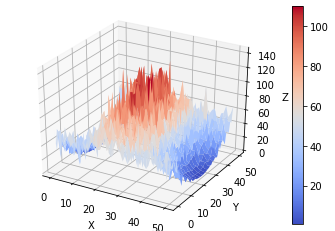

In [ ]:
(fig, ax, surf) = surface_plot(noisy, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 1: Forward exponential smoothing of rows (from left to right)

In [ ]:
#first of all we'll define a new matrix
ES = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))
a=0.335

for i in range(np.shape(noisy)[0]):
    ES[i,0] = true[i,0]

    for j in range(1, np.shape(noisy)[0]):
        ES[i,j] = ES[i,j-1] + a*(noisy[i,j] - ES[i,j-1])

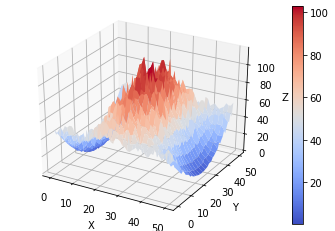

In [ ]:
(fig, ax, surf) = surface_plot(ES, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 2: Backward exponential smoothing of results obtained at step 1 (from right to left)

In [ ]:
BES = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES[i, np.shape(true)[0]-1] = ES[i, np.shape(true)[0]-1]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BES[i,j] = BES[i,j+1] + a*(ES[i,j] - BES[i, j+1])

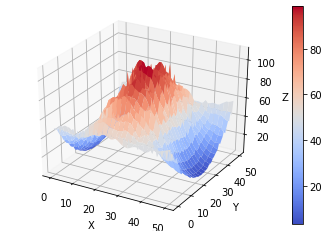

In [ ]:
(fig, ax, surf) = surface_plot(BES, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 3: Forward exponential smoothing of results obtained at step 2 along the columns (from bottom to top)

In [ ]:
FEScol = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    FEScol[0,i] = BES[0,i]

    for j in range(1, np.shape(noisy)[0]):
        FEScol[i,j] = FEScol[i-1,j] + a*(BES[i,j] - FEScol[i-1,j])

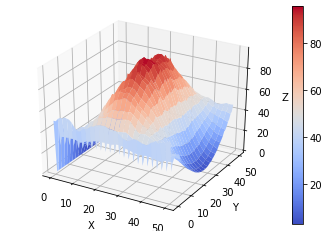

In [ ]:
(fig, ax, surf) = surface_plot(FEScol, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 4: Backward exponential smoothing of results obtained at step 3 along the columns (from top to bottom)

In [ ]:
BEScol = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BEScol[np.shape(true)[0]-1, i] = FEScol[np.shape(true)[0]-1, i]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BEScol[i,j] = BEScol[i,j+1] + a*(FEScol[i,j] - BEScol[i, j+1])

***5. Compare visually the obtained estimation results and true surface.***

Now we'll plot the resulting surface to compare

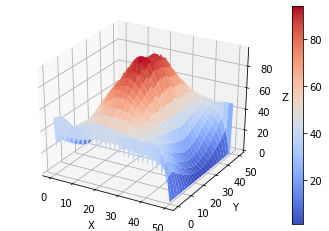

In [ ]:
(fig, ax, surf) = surface_plot(BEScol, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Now we'll plot the true surface to compare

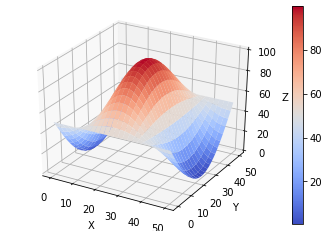

In [ ]:
(fig, ax, surf) = surface_plot(true, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

***6. Determine the variance of deviation of smoothed surface from the true one.Compare the variance with that from item 3.***

In [ ]:
#Here we'll reshape the last matrix which we used in smoothing
BEScol_line = np.reshape(BEScol, np.shape(true)[0]**2)

In [ ]:
Var1 = 0
for i in range(1,np.shape(true)[0]**2):
    Var1 += (1/(np.shape(true)[0]**2-1))*(true_line[i]-BEScol_line[i])**2
print('The initial variance of deviation is', Var)
print('The new variance of deviation is', Var1)

The initial variance of deviation is 122.87308206873873
The new variance of deviation is 84.93300236169223


Thus, the smoothing showed a good result both visually and numerically.

***7. Try greater and smaller values of smoothing coefficient 𝛼 and explain the affect on estimation results.***

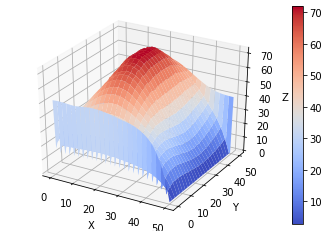

In [ ]:
#first of all we'll define a new matrix
ES_1 = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))
a=0.15

for i in range(np.shape(noisy)[0]):
    ES_1[i,0] = true[i,0]

    for j in range(1, np.shape(noisy)[0]):
        ES_1[i,j] = ES_1[i,j-1] + a*(noisy[i,j] - ES_1[i,j-1])

BES_1 = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES_1[i, np.shape(true)[0]-1] = ES_1[i, np.shape(true)[0]-1]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BES_1[i,j] = BES_1[i,j+1] + a*(ES_1[i,j] - BES_1[i, j+1])

FES_1col = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    FES_1col[0,i] = BES_1[0,i]

    for j in range(1, np.shape(noisy)[0]):
        FES_1col[i,j] = FES_1col[i-1,j] + a*(BES_1[i,j] - FES_1col[i-1,j])

BES_1col = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES_1col[np.shape(true)[0]-1, i] = FES_1col[np.shape(true)[0]-1, i]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BES_1col[i,j] = BES_1col[i,j+1] + a*(FES_1col[i,j] - BES_1col[i, j+1])

(fig, ax, surf) = surface_plot(BES_1col, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()       

In [ ]:
BES_1col_line = np.reshape(BES_1col, np.shape(true)[0]**2)
Var_1 = 0
for i in range(1,np.shape(true)[0]**2):
    Var_1 += (1/(np.shape(true)[0]**2-1))*(true_line[i]-BES_1col_line[i])**2
print('The initial variance of deviation is', Var)
print('The new variance of deviation is', Var_1)

The initial variance of deviation is 122.87308206873873
The new variance of deviation is 401.29328096063216


Thus, with smaller values of smoothing coefficient 𝛼 this method smooths the 
data too much and the value of variance of deviation becomes too large.

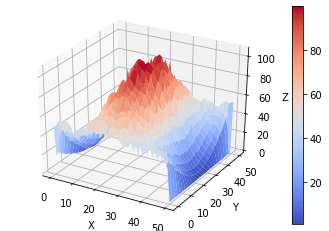

In [ ]:
#first of all we'll define a new matrix
ES_2 = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))
a=0.6

for i in range(np.shape(noisy)[0]):
    ES_2[i,0] = true[i,0]

    for j in range(1, np.shape(noisy)[0]):
        ES_2[i,j] = ES_2[i,j-1] + a*(noisy[i,j] - ES_2[i,j-1])

BES_2 = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES_2[i, np.shape(true)[0]-1] = ES_2[i, np.shape(true)[0]-1]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BES_2[i,j] = BES_2[i,j+1] + a*(ES_2[i,j] - BES_2[i, j+1])

FES_2col = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    FES_2col[0,i] = BES_2[0,i]

    for j in range(1, np.shape(noisy)[0]):
        FES_2col[i,j] = FES_2col[i-1,j] + a*(BES_2[i,j] - FES_2col[i-1,j])

BES_2col = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES_2col[np.shape(true)[0]-1, i] = FES_2col[np.shape(true)[0]-1, i]
    
    for j in range(np.shape(noisy)[0]-2, -1, -1):
        BES_2col[i,j] = BES_2col[i,j+1] + a*(FES_2col[i,j] - BES_2col[i, j+1])

(fig, ax, surf) = surface_plot(BES_2col, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()  

In [ ]:
BES_2col_line = np.reshape(BES_2col, np.shape(true)[0]**2)
Var_2 = 0
for i in range(1,np.shape(true)[0]**2):
    Var_2 += (1/(np.shape(true)[0]**2-1))*(true_line[i]-BES_2col_line[i])**2
print('The initial variance of deviation is', Var)
print('The new variance of deviation is', Var_2)

The initial variance of deviation is 122.87308206873873
The new variance of deviation is 33.46952756593354


That is, we made rather bad smoothing but the variation is smaller, which means that shape is mostly conserved, but noise is still present.

***8. Make conclusions to the Assignment.***

Main drawback of forward exponential mean method, the shift, was eliminated in backward exponential mean method. The forward-backward method worked
better for processing sunspot number data, but not with all smoothing constants. Optimal smoothing constant $\alpha$ should be determined for the method to
perform better. Deviation and variability indicators can be used as criteria for an evaluation method. Also, for finding optimal smoothing constant.
Forward-backward exponential mean method can be applied to smooth surface measurements.